A density estimator is an algorithm which seeks to model the probability distribution that generated a dataset

In [48]:
%matplotlib inline


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which controls the size of the kernel at each point.

* shape is controled by kernel
* size is control by bandwidth

In [71]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
from sklearn.model_selection import train_test_split
eps=np.finfo(float).eps
# from binarytree import tree,Node
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
import copy
import collections
from pylab import *

In [72]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [73]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data1 = digits.images.reshape((n_samples, -1))
y=digits.target

In [74]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA
import sys
import copy

In [53]:
print(y)

[0 1 2 ... 8 9 8]


In [54]:
print(data1)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [75]:
# n_components = np.arange(1, 41)
# print(n_components)
n_components=[]
for i in range(50,210,10):
    n_components.append(i)

In [56]:
# n_components = np.arange(1, 41)

In [76]:
from sklearn import metrics
import numpy as np
from sklearn import mixture

In [77]:
# models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(data1)
#           for n in n_components]
# print(models)

In [59]:
# print(models[0])
# models[0].bic(data1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


366728.3524624546

In [78]:
models=[]
for k in n_components:
    temp=mixture.GaussianMixture(k, covariance_type='full', random_state=0).fit(data1)
    models.append(temp)

In [61]:
# print(models)

[GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None), GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None), GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None), GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        rando

In [79]:
bic1=[]
for m in models:
    bic1.append(m.bic(data1))

In [80]:
aic1=[]
for m in models:
    temp1=m.aic(data1)
    aic1.append(temp1)

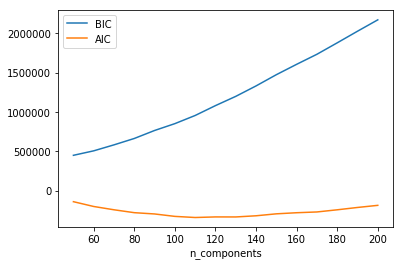

In [81]:
   
plt.plot(n_components,bic1, label='BIC')
plt.plot(n_components,aic1, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [66]:
def purity_score_GMM(y_true, y_pred):
    contingency_matrix =metrics.cluster.contingency_matrix(y_true, y_pred)
    num2=np.sum(np.amax(contingency_matrix, axis=0))
    print(np.sum(np.amax(contingency_matrix, axis=0)))
    print(np.sum(contingency_matrix))
    deno=np.sum(contingency_matrix)
    return num2/deno 

gm=mixture.GaussianMixture(n_components=110).fit(data1)
labels = gm.predict(data1)
print("----------Gaussian Purity Score------------------")
print(purity_score_GMM(y,labels))

----------Gaussian Purity Score------------------
1748
1797
0.9727323316638843
